
SAMPLING FOR MODEL 'model' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 1e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.1 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.065961 seconds (Warm-up)
Chain 1:                0.02284 seconds (Sampling)
Chain 1:                0.08880

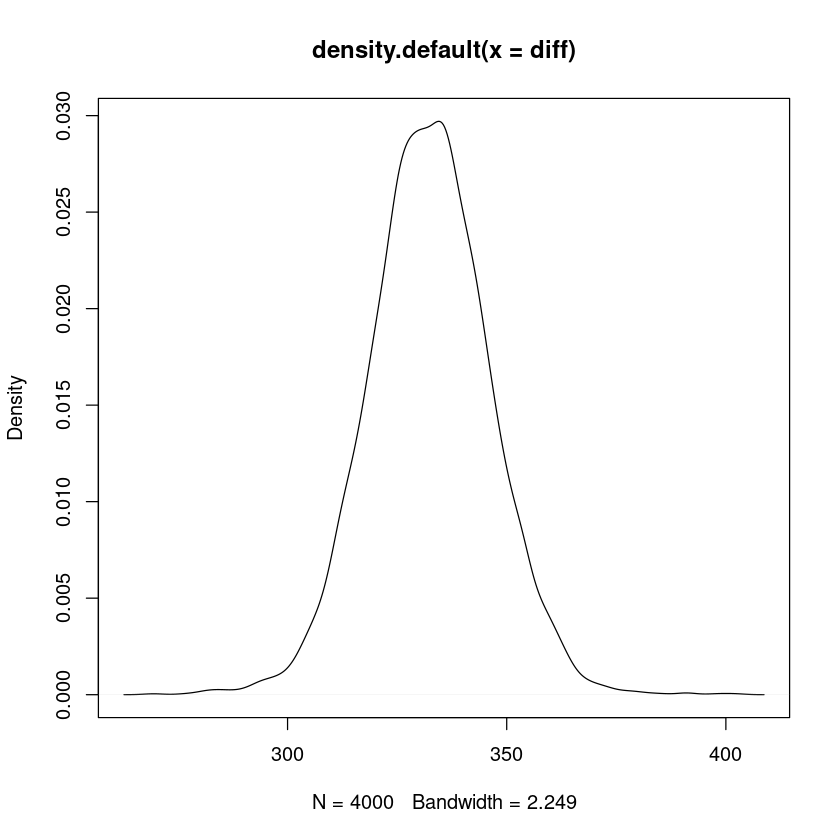

In [9]:
library(rstan)

x = c(63.4, 38.6, 36.6, 27.2, 29.6, 27.1, 28.6, 31.7, 29.5, 36.0)
y = c(442, 423, 322, 378, 329, 361, 347, 346, 388, 338)

model <- stan_model("model.stan")
fit <- sampling(model, data=list(N=10, x=x, y=y))

diff <- rstan::extract(fit)$diff
p <- sum(ifelse(diff>0,1,0)) / length(diff)
plot(density(diff))

In [11]:
fit

Inference for Stan model: model.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

          mean se_mean    sd   2.5%    25%    50%    75%  97.5% n_eff Rhat
mu_x     34.76    0.07  3.68  27.57  32.35  34.71  37.04  42.31  3003    1
sigma_x  11.31    0.05  2.78   7.35   9.36  10.83  12.73  18.45  2582    1
mu_y    367.17    0.24 13.21 341.10 358.64 367.20 375.42 393.73  3135    1
sigma_y  41.06    0.20 10.62  26.34  33.91  39.10  45.53  67.62  2815    1
diff    332.41    0.24 13.68 305.77 323.69 332.34 341.28 359.26  3161    1
lp__    -71.57    0.04  1.53 -75.43 -72.31 -71.22 -70.43 -69.67  1679    1

Samples were drawn using NUTS(diag_e) at Sun Jul  4 16:45:05 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

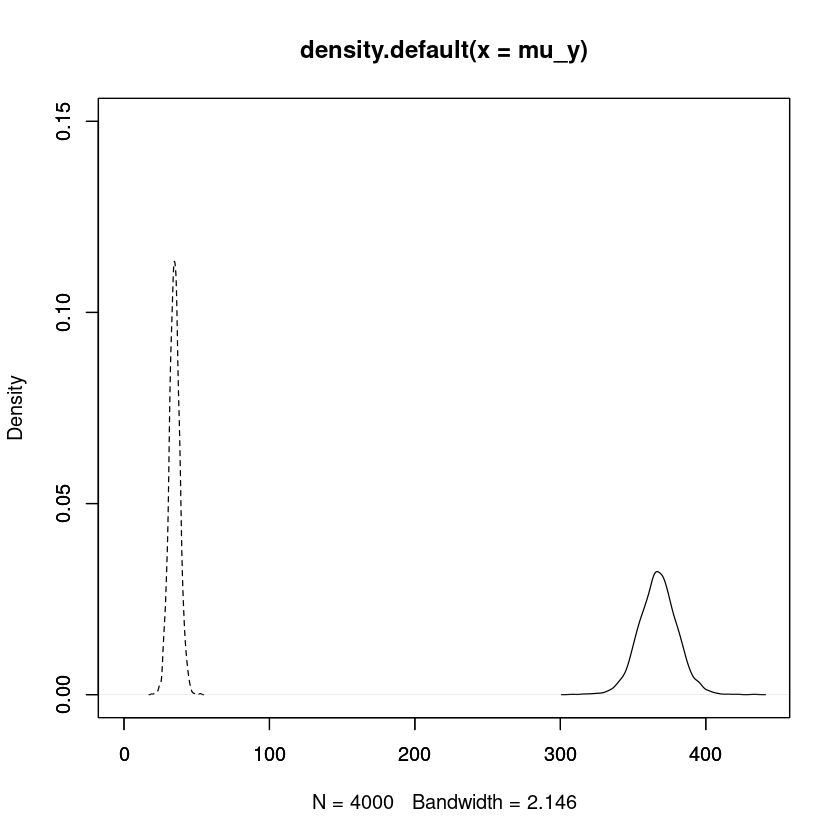

In [20]:
mu_x <- rstan::extract(fit)$mu_x
mu_y <- rstan::extract(fit)$mu_y
# plot(density(mu_y))
plot(density(mu_x), xlim=c(0,440), ylim=c(0,0.15), ann=F, lty=2)
par(new=T)
plot(density(mu_y), xlim=c(0,440), ylim=c(0,0.15))

[1] 4000

[1] 4000

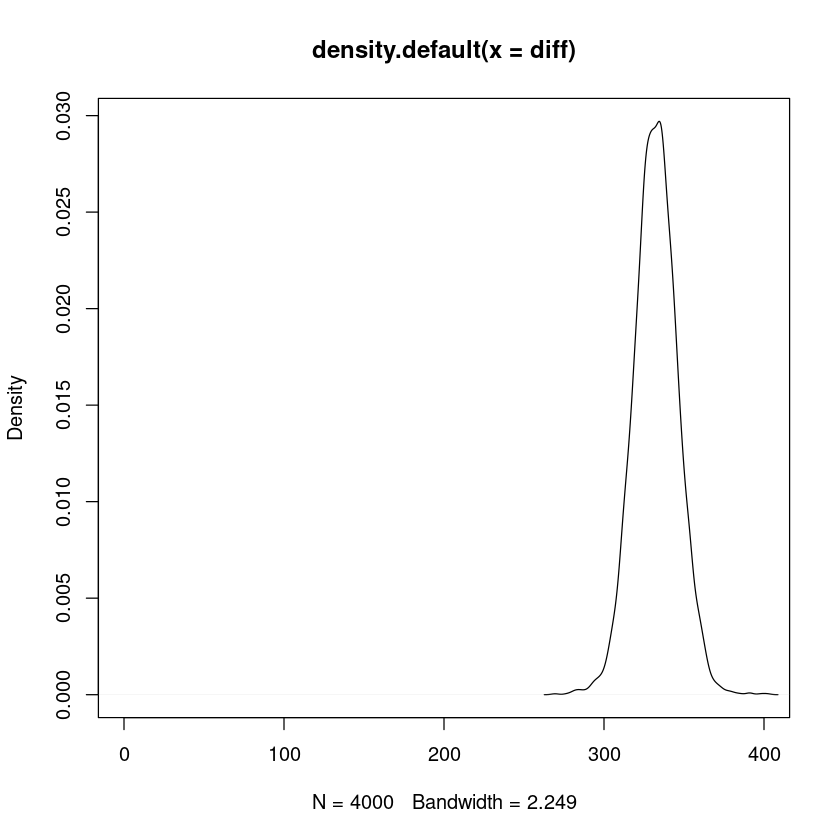

In [23]:
sum(ifelse(diff>0,1,0))
length(diff)
plot(density(diff), xlim=c(0,400))